# Can BERT distinguish the hypernym and hyponym? 

Given a input x, we mine: 

(1) its hypernyms, measure (1) the mAP of hypernyms  (2) the mAP of coordinate 

(2) its anchors, measure (1) the mAP of coordinates (2) the mAP of hypernyms

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth',500)

from inflection import singularize, pluralize
# path = '../../log/bert-large-uncased/bless/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_True_wnp_False_cpt_False.COORDINATE.csv'

path = '../../log/bert-large-uncased/BLESS/coordinate/exp_data_results_anchor_type_Coordinate_remove_Y_PUNC_FULL_concate_or_single_max_anchor_num_10_anchor_scorer_probAvg_filter_obj_True_filter_objects_with_input_False_wnp_True_cpt_False.BLESS.csv'
df_raw = pd.read_csv(path)
df_raw['obj_label'] = df_raw['obj_label'].apply(lambda x: eval(x)[0]) 
df_raw['sub_sister'] = df_raw['sub_sister'].apply(lambda x: eval(x))
df_raw['subj_anchors_sg'] = df_raw['subj_anchors_sg'].apply(lambda x: eval(x)[1:6])

# df_raw.head(5)
# df['subj_anchors'] = df['subj_anchors'].apply(lambda x: [singularize(word) for word in eval(x)])


In [2]:
df = []
for name, group in df_raw.groupby('sub_label_sg'):
    y_pred = group['subj_anchors_sg'].values[0]
    if name in y_pred: y_pred.remove(name)
    else: y_pred = y_pred[:5]
        
    y_true = group['obj_label'].values
    obj_label = group['obj_label'].values
    df.append({'sub_label': name, 'subj_anchors': y_pred, 'sub_sister': y_true, 'obj_label': obj_label})
df = pd.DataFrame(df)
#     print(name, y_pred, y_true)

df['shared_sister_anchors'] = df[['sub_sister', 'subj_anchors']].apply(lambda x: set(x[0]).intersection(set((x[1]))), axis=1)
df['shared_sister_anchors_num'] = df['shared_sister_anchors'].apply(lambda x: len(x))
# df['shared_obj_anchors_num'] = df['shared_obj_anchors'].apply(lambda x: len(x))
df.head()

,sub_label,subj_anchors,sub_sister,obj_label,shared_sister_anchors,shared_sister_anchors_num
0,acacia,"[palm, oak, eucalyptus, beech, mahogany]","[birch, cedar, cypress, elm, oak, pine, poplar, willow]","[birch, cedar, cypress, elm, oak, pine, poplar, willow]",{oak},1
1,alligator,"[snake, crocodile, turtle, lizard, fox]","[crocodile, frog, lizard, snake, toad, turtle]","[crocodile, frog, lizard, snake, toad, turtle]","{lizard, crocodile, turtle, snake}",4
2,ambulance,"[bus, taxi, police, truck, motorcycle]","[battleship, bicycle, bike, bomber, bus, car, ferry, fighter, frigate, glider, helicopter, jet, moped, motorbike, motorcycle, scooter, tanker, tractor, train, truck, van, yacht]","[battleship, bicycle, bike, bomber, bus, car, ferry, fighter, frigate, glider, helicopter, jet, moped, motorbike, motorcycle, scooter, tanker, tractor, train, truck, van, yacht]","{bus, truck, motorcycle}",3
3,ant,"[bee, wasp, beetle, bug, drone]","[bee, beetle, butterfly, cockroach, cricket, dragonfly, fly, grasshopper, hornet, ladybug, locust, mosquito, moth, silverfish, wasp]","[bee, beetle, butterfly, cockroach, cricket, dragonfly, fly, grasshopper, hornet, ladybug, locust, mosquito, moth, silverfish, wasp]","{beetle, bee, wasp}",3
4,apple,"[grape, pear, date, banana, berry]","[apricot, banana, cherry, coconut, cranberry, grape, grapefruit, lemon, lime, peach, pear, pineapple, plum, strawberry]","[apricot, banana, cherry, coconut, cranberry, grape, grapefruit, lemon, lime, peach, pear, pineapple, plum, strawberry]","{banana, grape, pear}",3


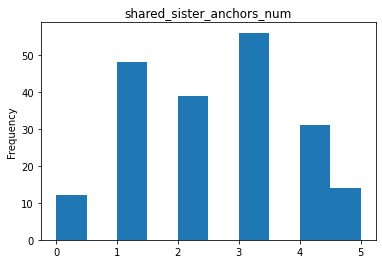

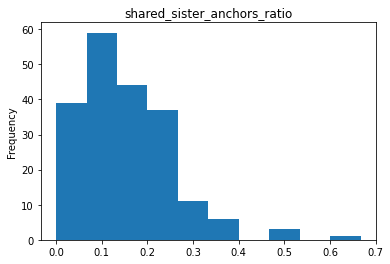

In [3]:
# df['shared_sister_anchors'] = df[['sub_sister', 'subj_anchors']].apply(lambda x: set(eval(x[0])).intersection(set((x[1]))), axis=1)
# # df['shared_obj_anchors'] = df[['obj_label', 'subj_anchors']].apply(lambda x: set(eval(x[0])).intersection(set((x[1]))), axis=1)

# df['shared_sister_anchors_num'] = df['shared_sister_anchors'].apply(lambda x: len(x))
# # df['shared_obj_anchors_num'] = df['shared_obj_anchors'].apply(lambda x: len(x))

df['shared_sister_anchors_ratio'] = df[['shared_sister_anchors', 'sub_sister']].apply(lambda x: len(x[0])/len(x[1]), axis=1)
# df['shared_obj_anchors_ratio'] = df[['shared_obj_anchors', 'obj_label']].apply(lambda x: len(x[0])/len(x[1]), axis=1)


# display(df['shared_obj_anchors_num'].plot(kind='hist', title='shared_obj_anchors_num'))
# plt.show()
display(df['shared_sister_anchors_num'].plot(kind='hist', title='shared_sister_anchors_num'))
plt.show()

display(df['shared_sister_anchors_ratio'].plot(kind='hist', title='shared_sister_anchors_ratio'))
# plt.show()
# display(df['shared_obj_anchors_ratio'].plot(kind='hist', title='shared_obj_anchors_ratio'))

# query_cols = ['sub_label', 'obj_label', 'sub_sister', 'subj_anchors', 'def_sap' ,  'p5_def_sap', 'shared_obj_anchors', 'shared_sister_anchors']
# display(df[query_cols])



In [16]:
display(df.query("shared_sister_anchors_ratio <=0.1").sample(50))

,sub_label,subj_anchors,sub_sister,obj_label,shared_sister_anchors,shared_sister_anchors_num,shared_sister_anchors_ratio
18,bomber,"[submarine, torpedo, man, boxer]","[ambulance, battleship, bus, car, ferry, fighter, frigate, glider, helicopter, jet, motorcycle, rocket, scooter, tanker, train, truck, van, yacht]","[ambulance, battleship, bus, car, ferry, fighter, frigate, glider, helicopter, jet, motorcycle, rocket, scooter, tanker, train, truck, van, yacht]",{},0,0.000000
112,lime,"[oak, lemon, ash, oil, hazel]","[apple, apricot, banana, cherry, coconut, cranberry, grape, grapefruit, lemon, orange, peach, pear, pineapple, plum, strawberry, tangerine]","[apple, apricot, banana, cherry, coconut, cranberry, grape, grapefruit, lemon, orange, peach, pear, pineapple, plum, strawberry, tangerine]",{lemon},1,0.062500
9,battleship,"[cruiser, submarine, frigate, destroyer, carrier]","[ambulance, bomber, bus, canoe, car, caravel, ferry, fighter, frigate, glider, helicopter, jet, kayak, motorboat, motorcycle, raft, scooter, tanker, train, truck, van, yacht]","[ambulance, bomber, bus, canoe, car, caravel, ferry, fighter, frigate, glider, helicopter, jet, kayak, motorboat, motorcycle, raft, scooter, tanker, train, truck, van, yacht]",{frigate},1,0.045455
45,coat,"[shoe, clothes, clothing, jacket, shirt]","[apron, blouse, bra, cloak, dress, fleece, glove, hat, jacket, pant, pants, pullover, raincoat, robe, scarf, shirt, sock, socks, stocking, stockings, sweater, sweatshirt, trouser, trousers, underpant, underpants, vest, dress]","[apron, blouse, bra, cloak, dress, fleece, glove, hat, jacket, pant, pants, pullover, raincoat, robe, scarf, shirt, sock, socks, stocking, stockings, sweater, sweatshirt, trouser, trousers, underpant, underpants, vest, dress]","{jacket, shirt}",2,0.071429
85,goat,"[lamb, bull, buffalo, ram]","[antelope, bear, beaver, bull, cat, cow, coyote, deer, dog, dolphin, donkey, elephant, fox, giraffe, gorilla, horse, ibex, lion, pig, rabbit, rat, sheep, squirrel, tiger, whale]","[antelope, bear, beaver, bull, cat, cow, coyote, deer, dog, dolphin, donkey, elephant, fox, giraffe, gorilla, horse, ibex, lion, pig, rabbit, rat, sheep, squirrel, tiger, whale]",{bull},1,0.040000
73,fighter,"[combatant, hero, killer, bomber, engineer]","[ambulance, battleship, bomber, bus, car, ferry, fighter, frigate, glider, jet, motorcycle, rocket, scooter, tanker, train, truck, van, yacht, train]","[ambulance, battleship, bomber, bus, car, ferry, fighter, frigate, glider, jet, motorcycle, rocket, scooter, tanker, train, truck, van, yacht, train]",{bomber},1,0.052632
87,goose,"[geese, turkey, chicken, swan]","[crow, dove, duck, eagle, falcon, hawk, owl, penguin, pheasant, pigeon, robin, sparrow, swan, vulture, woodpecker]","[crow, dove, duck, eagle, falcon, hawk, owl, penguin, pheasant, pigeon, robin, sparrow, swan, vulture, woodpecker]",{swan},1,0.066667
193,washer,"[driver, servant, cook, maid, machine]","[dishwasher, freezer, fridge, oven, phone, radio, refrigerator, stereo, stove, telephone, television, toaster]","[dishwasher, freezer, fridge, oven, phone, radio, refrigerator, stereo, stove, telephone, television, toaster]",{},0,0.000000
47,coconut,"[banana, fish, peanut, coffee, vegetable]","[apple, apricot, banana, cherry, cranberry, grape, grapefruit, lemon, lime, mango, papaya, peach, pear, pineapple, plum, strawberry]","[apple, apricot, banana, cherry, cranberry, grape, grapefruit, lemon, lime, mango, papaya, peach, pear, pineapple, plum, strawberry]",{banana},1,0.062500
32,castle,"[palace, church, fort, fortress, temple]","[cathedral, cottage, hospital, hotel, library, pub, restaurant, skyscraper, villa, warehouse]","[cathedral, cottage, hospital, hotel, library, pub, restaurant, skyscraper, villa, warehouse]",{},0,0.000000


In [5]:
from df_to_latex  import DataFrame2Latex

import random 
query = ['dog', 'apple', 'lime', 'corn', 'car', 'train', 'television'] #'alligator', , 'cat'
query = ['apple', 'train', 'glove', 'scarf']#, 'car', 'train', 'television'] #'alligator', , 'cat'

df_sample_paper = df.query(f"sub_label in {query}")[['sub_label', 'subj_anchors', 'sub_sister', 'shared_sister_anchors', 
                   'shared_sister_anchors_num', 'shared_sister_anchors_ratio']]

# df_sample_paper
# df_sample_paper['sub_sister_sample'] = .apply(lambda x: list(x[0]) + list()
sample_sub_sister = []
bold_subj_anchors = []
for shared, y_true, y_pred  in zip(df_sample_paper['shared_sister_anchors'], df_sample_paper['sub_sister'], df_sample_paper['subj_anchors']):
    y_true_only = list( set(y_true) - shared ) 
    max_sample_num = min(len(y_true_only), 5)
    print(len(y_true_only))
    
    if len(y_true_only)> 5:         
        y_true_sample = random.sample(y_true_only, 5 - len(shared)) + [ "\textbf{"+ x + "}" for x in shared ]
    sample_sub_sister.append(y_true_sample)
    
    y_pred_bold = []
    for x in y_pred:
        y_pred_bold.append("\textbf{"+ x + "}") if x in shared else y_pred_bold.append(x)
    bold_subj_anchors.append(y_pred_bold)
    
    
    #print(y_human_sample )
    
df_sample_paper['sub_sister_sample'] =   sample_sub_sister 
df_sample_paper['bold_subj_anchors'] =   bold_subj_anchors

# display(df_sample_paper)
# df_sample_paper = df_sample_paper[['sub_label', 'bold_subj_anchors', 'sub_sister_sample']].rename(columns={"sub_label": "x", 
#                                                                                             "bold_subj_anchors": "z", 
#                                                                                             'sub_sister_sample': "z`" })

df_sample_paper = df_sample_paper[['sub_label', 'bold_subj_anchors', 'sub_sister_sample']].rename(columns={"sub_label": "x", 
                                                                                            "bold_subj_anchors": "z", 
                                                                                            'sub_sister_sample': "z`" })


# DataFrame2Latex(df=df, label=f'tab:anchor_examples_bless', 
#             caption=f"Examples of mined anchors (z) and human corridinates (z`)",
#             output_file= None , #'../log/paper_results/latex.test.tex',
#             adjustbox_width = 'textwidth',
#             precision = 1,
#             column_format='lll',
#             multicolumn_format='c|',
#             hide_index=True
#             )


print( df_sample_paper.to_latex(index=False, escape=False) ) 
# DataFrame2Latex = 
# .head()
# df_sample = []
# for name, group in df.groupby('shared_sister_anchors_num'):
#     display(group)
#     group = group[['sub_label', 'subj_anchors', 'sub_sister', 'shared_sister_anchors', 
#                    'shared_sister_anchors_num', 'shared_sister_anchors_ratio']])
#     df_sample.append(group.sample(1))
    
# df_sample = pd.concat(df_sample)
# df_sample.sort_values(by='shared_sister_anchors_num', ascending=False)
# ['apple', fox', 'violin', 'spade']

11
29
38
16
\begin{tabular}{lll}
\toprule
    x &                                                                 z &                                                                 z` \\
\midrule
apple &     [\textbf{grape}, \textbf{pear}, date, \textbf{banana}, berry] & [pineapple, peach, \textbf{banana}, \textbf{grape}, \textbf{pear}] \\
glove & [\textbf{hat}, clothes, accessory, \textbf{shirt}, \textbf{mask}] &        [scarf, beret, \textbf{shirt}, \textbf{mask}, \textbf{hat}] \\
scarf &                   [fur, veil, \textbf{robe}, skirt, \textbf{hat}] &                   [vest, bowtie, cap, \textbf{hat}, \textbf{robe}] \\
train &                        [coach, \textbf{bus}, boat, station, tram] &                   [scooter, bomber, frigate, glider, \textbf{bus}] \\
\bottomrule
\end{tabular}



<ipython-input-5-dc849582652e>:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print( df_sample_paper.to_latex(index=False, escape=False) )


In [117]:
df_sample_paper

,x,z,z`
4,apple,"[\textbf{grape}, \textbf{pear}, date, \textbf{banana}, berry]","[peach, lime, \textbf{pear}, \textbf{grape}, \textbf{banana}]"
29,car,"[\textbf{truck}, \textbf{motorcycle}, \textbf{bike}, \textbf{bicycle}, cart]","[bomber, \textbf{bicycle}, \textbf{bike}, \textbf{truck}, \textbf{motorcycle}]"
33,cat,"[wolf, pet, \textbf{bear}, bird]","[rat, donkey, bull, dolphin, \textbf{bear}]"
50,corn,"[maize, barley, wheat, \textbf{bean}, grain]","[garlic, broccoli, lettuce, beet, \textbf{bean}]"
112,lime,"[oak, \textbf{lemon}, ash, oil, hazel]","[tangerine, orange, pear, grape, \textbf{lemon}]"
177,television,"[\textbf{radio}, \textbf{computer}, camera, cinema, film]","[oven, stereo, dishwasher, \textbf{radio}, \textbf{computer}]"
180,train,"[coach, \textbf{bus}, boat, station, tram]","[fighter, ambulance, van, yacht, \textbf{bus}]"


In [96]:
bold_subj_anchors

[['\textbf{crocodile}',
  'frog',
  '\textbf{lizard}',
  '\textbf{snake}',
  'toad',
  '\textbf{turtle}'],
 ['apricot',
  '\textbf{banana}',
  'cherry',
  'coconut',
  'cranberry',
  '\textbf{grape}',
  'grapefruit',
  'lemon',
  'lime',
  'peach',
  '\textbf{pear}',
  'pineapple',
  'plum',
  'strawberry'],
 ['beaver',
  'bull',
  'cat',
  'cow',
  'coyote',
  'deer',
  '\textbf{dog}',
  'dolphin',
  'donkey',
  'elephant',
  '\textbf{fox}',
  'giraffe',
  'goat',
  'gorilla',
  'horse',
  'lion',
  'pig',
  'rabbit',
  'rat',
  'sheep',
  'squirrel',
  'tiger',
  'whale'],
 ['ambulance',
  'battleship',
  '\textbf{bicycle}',
  '\textbf{bike}',
  'bomber',
  'bus',
  'ferry',
  'fighter',
  'frigate',
  'glider',
  'helicopter',
  'jet',
  'moped',
  'motorbike',
  '\textbf{motorcycle}',
  'scooter',
  'tanker',
  'tractor',
  'train',
  '\textbf{truck}',
  'van',
  'yacht'],
 ['\textbf{bear}',
  'beaver',
  'bull',
  'cougar',
  'cow',
  'coyote',
  'deer',
  'dog',
  'dolphin',
  'd

In [17]:
print("At least one anchors:", len(df.query("shared_sister_anchors_ratio>0").index))

At least one anchors: 193


In [14]:
df[['sub_label', 'sub_sister', 'subj_anchors', 'shared_sister_anchors', 'shared_sister_anchors_ratio']]

,sub_label,sub_sister,subj_anchors,shared_sister_anchors,shared_sister_anchors_ratio
0,acacia,"['birch', 'cedar', 'cypress', 'elm', 'oak', 'pine', 'poplar', 'willow']","[eucalyptu, cedar, palm, beech, oak, palm, bamboo, birch, willow, cypress]","{oak, birch, willow, cedar, cypress}",0.070423
1,alligators,"['crocodile', 'frog', 'lizard', 'snake', 'toad', 'turtle']","[snake, turtle, frog, lizard, shark, tiger, deer, fish, bear, crab]","{lizard, frog, turtle, snake}",0.068966
2,ambulances,"['battleship', 'bicycle', 'bike', 'bomber', 'bus', 'car', 'ferry', 'fighter', 'frigate', 'glider', 'helicopter', 'jet', 'moped', 'motorbike', 'motorcycle', 'scooter', 'tanker', 'tractor', 'train', 'truck', 'van', 'yacht']","[police, bus, helicopter, car, cop, em, plane, firefighter, siren, hospital]","{helicopter, car, bus}",0.013575
3,ants,"['bee', 'beetle', 'butterfly', 'cockroach', 'cricket', 'dragonfly', 'fly', 'grasshopper', 'hornet', 'ladybug', 'locust', 'mosquito', 'moth', 'silverfish', 'wasp']","[bee, beetle, wasp, ye, fly, bug, hornet, mouse, spider, snake]","{bee, wasp, hornet, beetle, fly}",0.030864
4,apples,"['apricot', 'banana', 'cherry', 'coconut', 'cranberry', 'grape', 'grapefruit', 'lemon', 'lime', 'peach', 'pear', 'pineapple', 'plum', 'strawberry']","[grape, pear, nut, vegetable, banana, date, berry, potato, tomato, nut]","{grape, banana, pear}",0.020408
...,...,...,...,...,...
195,whales,"['bear', 'beaver', 'bull', 'carp', 'catfish', 'cod', 'cow', 'coyote', 'deer', 'dog', 'dolphin', 'donkey', 'elephant', 'fox', 'giraffe', 'goat', 'goldfish', 'gorilla', 'herring', 'horse', 'lion', 'mackerel', 'pig', 'rabbit', 'rat', 'salmon', 'sheep', 'squirrel', 'tiger', 'trout', 'tuna']","[dolphin, ye, seal, shark, especially, dolphin, fish, maybe, bird, actually]",{dolphin},0.003484
196,willows,"['acacia', 'birch', 'cedar', 'cypress', 'elm', 'oak', 'pine', 'poplar']","[oak, birch, oak, tree, shrub, pine, bush, rush, pine, ash]","{oak, pine, birch}",0.042254
197,woodpeckers,"['blackbird', 'crow', 'dove', 'eagle', 'falcon', 'goose', 'hawk', 'owl', 'penguin', 'pheasant', 'pigeon', 'robin', 'sparrow', 'swallow', 'swan', 'vulture']","[crow, owl, falcon, hawk, raven, squirrel, bird, eagle, duck, owl]","{hawk, crow, eagle, owl, falcon}",0.032258
198,wrenches,"['axe', 'chisel', 'corkscrew', 'drill', 'fork', 'hammer', 'hatchet', 'knife', 'mallet', 'nutcracker', 'pincer', 'pincers', 'plier', 'pliers', 'rake', 'saw', 'scissor', 'scissors', 'screwdriver', 'shovel', 'sieve', 'spade', 'spoon', 'tweezer', 'tweezers']","[nail, maybe, chain, bolt, nut, ye, rope, actually, wire, obviously]",{},0.000000


In [25]:
from collections import OrderedDict


# display(df[['obj_label','obj_mask_lsp_dap']])

# def merge_predictions_in_concept_level(uniform_funcion, words):
#     '''
#     uniform_function: either signualarize or pluralize 
#     '''
#     top_k_output =  []

#     for word in words:
#         uniformed_word = uniform_funcion(word) 
#         if uniformed_word not in top_k_output: 
#             top_k_output.append(uniformed_word)
#     return top_k_output 



def merge_anchors_in_concept_level(uniform_funcion, words, top_k):
    '''
    uniform_function: either signualr or plural
    
    '''
    words_uniformed = [uniform_funcion(word) for word in words]
    
    top_k_output =  []
    for word in words:
        uniformed_word = uniform_funcion(word) 
        if uniformed_word not in top_k_output: 
            top_k_output.append(uniformed_word)
        if len(top_k_output) == top_k: 
            return top_k_output

    return top_k_output[:top_k]


def merge_predictions_in_concept_level(uniform_funcion, words):
    '''
    uniform_function: either signualarize or pluralize 
    '''
    words_uniformed = [uniform_funcion(word) for word in words]
    return list(OrderedDict.fromkeys(words_uniformed))


words = ['fruits', 'things', 'fruit', 'agriculture', 'vegetables', 'nuts', 'items', 'produce', 'food', 'grapes']
merge_predictions_in_concept_level(singularize, words)


# # items = [1, 2, 0, 1, 3, 2]
# items = words 
# iterms_new = list(OrderedDict.fromkeys(items))
# iterms_new
# # ['food', 'fruit', 'produce', 'food', 'fruit', 'produce']	
# # average_precision_at_k()

['fruit',
 'thing',
 'agriculture',
 'vegetable',
 'nut',
 'item',
 'produce',
 'food',
 'grape']